<a href="https://colab.research.google.com/github/aravind598/Data_Science_Proj/blob/master/Data%20Science%20Project/Classifer_vs_Classifier_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data & Libraries 


In [0]:
#Run This

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import graphviz
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly import tools
import cufflinks as cf
!pip install catboost
from catboost import CatBoostClassifier   
from lightgbm import LGBMClassifier 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 64.4MB 63kB/s 


In [0]:
#Run This Very Important

In [0]:
url = 'https://raw.githubusercontent.com/aravind598/Github/aravind598/train_labels.csv?token=ANW7SFBKZIJTONPGC67MZMS6SCJR2'
urll = 'https://raw.githubusercontent.com/aravind598/Github/aravind598/train_values.csv?token=ANW7SFBK2YMNTYBWW44PE7C6SCJSE'
url2 = 'https://raw.githubusercontent.com/aravind598/Github/aravind598/test_values.csv?token=ANW7SFHJZIY2XRWW5QVSW4S6SCS5I'

In [0]:
#Run This Very important

In [0]:
df1 = pd.read_csv(url)
df2 = pd.read_csv(urll)
df3 = pd.merge(df2,df1)
test_data = pd.read_csv(url2)


In [0]:
numericdata = pd.DataFrame(df3[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id',	'count_floors_pre_eq',	'age',	'area_percentage',	'height_percentage',
                            'has_superstructure_adobe_mud',	'has_superstructure_mud_mortar_stone',	
                            'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick',	
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',
                            'has_superstructure_rc_engineered',	'has_superstructure_other',	'count_families',	'has_secondary_use',	
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel',	'has_secondary_use_rental',	'has_secondary_use_institution',	
                            'has_secondary_use_school',	'has_secondary_use_industry',	'has_secondary_use_health_post',	'has_secondary_use_gov_office',	
                            'has_secondary_use_use_police',	'has_secondary_use_other', 'damage_grade']])

catData = pd.DataFrame(df3[['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']])

numeric_testdata = pd.DataFrame(test_data[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id',	'count_floors_pre_eq',	'age',	'area_percentage',	'height_percentage',
                            'has_superstructure_adobe_mud',	'has_superstructure_mud_mortar_stone',	
                            'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick',	
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',
                            'has_superstructure_rc_engineered',	'has_superstructure_other',	'count_families',	'has_secondary_use',	
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel',	'has_secondary_use_rental',	'has_secondary_use_institution',	
                            'has_secondary_use_school',	'has_secondary_use_industry',	'has_secondary_use_health_post',	'has_secondary_use_gov_office',	
                            'has_secondary_use_use_police',	'has_secondary_use_other']])

numtrain = pd.DataFrame(df3[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id',	'count_floors_pre_eq',	'age',	'area_percentage',	'height_percentage',
                            'has_superstructure_adobe_mud',	'has_superstructure_mud_mortar_stone',	
                            'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick',	
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',
                            'has_superstructure_rc_engineered',	'has_superstructure_other',	'count_families',	'has_secondary_use',
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel',	'has_secondary_use_rental',	'has_secondary_use_institution',	
                            'has_secondary_use_school',	'has_secondary_use_industry',	'has_secondary_use_health_post',	'has_secondary_use_gov_office',	
                            'has_secondary_use_use_police',	'has_secondary_use_other']])
alldata = pd.DataFrame(df3[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id'	,'count_floors_pre_eq',	'age'	,'area_percentage',	'height_percentage'	,'land_surface_condition'	,
                            'foundation_type',	'roof_type',	'ground_floor_type'	,'other_floor_type'	,'position'	,'plan_configuration',	'has_superstructure_adobe_mud',	
                            'has_superstructure_mud_mortar_stone'	,'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick'	,
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',	
                            'has_superstructure_rc_engineered'	, 'has_superstructure_other',	'legal_ownership_status',	'count_families',	'has_secondary_use',	
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel'	,'has_secondary_use_rental'	,'has_secondary_use_institution',	'has_secondary_use_school',
                            'has_secondary_use_industry','has_secondary_use_health_post',	'has_secondary_use_gov_office',	'has_secondary_use_use_police',	'has_secondary_use_other']])
#With Categorical Values as Dummmies
xingdata = pd.DataFrame(pd.get_dummies(catData, columns=catData.columns, drop_first=True))
lastData = numtrain.join(xingdata)


numtest = pd.DataFrame(test_data)
num = round(0.8*len(numtrain.index))
no = len(numtrain.index) - num
dog = num + no



# Import New Data (Others) & Libraries 

In [0]:
#From Github 
# https://github.com/SAR2652/Richter-s-Predictor-Modeling-Earthquake-Damage/blob/master/new_solution.ipynb

In [6]:
X = pd.DataFrame(df3)
y = pd.DataFrame(df3[['damage_grade']])

#One Hot vs LabelEncoding https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b
#Manual Standard Scaling for "Age" and "count floors pre eq" 
# Possible to use Sklearn library
# One Hot Encoding requires a 2D matrix but however if rows in a dataset are proved to be odd then it is impossible for the dataset to be exactly divisible by two 
# Therefore pandas actually may prove to be a better option instead of using sklearn OHC
age = X['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X['age'] = age.T


floors = X['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X['count_floors_pre_eq'] = floors.T


#Min-Max Scaling of Datset
#Refer to this http://benalexkeen.com/feature-scaling-with-scikit-learn/ and https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

ap = X['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X.drop(['area_percentage'], axis = 1, inplace = True)
X['area_percentage'] = ap.T



hp = X['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X.drop(['height_percentage'], axis = 1, inplace = True)
X['height_percentage'] = hp.T


cuts = pd.cut(X['geo_level_1_id'], 21)
X.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_1_id'] = cuts.T



cuts = pd.cut(X['geo_level_2_id'], 23)
X.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_2_id'] = cuts.T

temp = X['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X.drop(['geo_level_3_id'], axis = 1, inplace = True)
X['geo_level_3_id'] = temp.T


cf = X['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X.drop(['count_families'], axis = 1, inplace = True)
X['count_families'] = np.array(cf_new).T


category_cols = ['geo_level_1_id', 'geo_level_2_id', 'roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
X = pd.get_dummies(X, columns = category_cols)
X.drop(['damage_grade'], axis=1 ,inplace=True)
X.drop(['building_id'], axis=1 ,inplace=True)

X.head()


,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,age,count_floors_pre_eq,area_percentage,height_percentage,geo_level_3_id,count_families,geo_level_1_id_0,geo_level_1_id_1,geo_level_1_id_2,geo_level_1_id_3,geo_level_1_id_4,geo_level_1_id_5,geo_level_1_id_6,geo_level_1_id_7,geo_level_1_id_8,geo_level_1_id_9,geo_level_1_id_10,geo_level_1_id_11,...,geo_level_2_id_21,geo_level_2_id_22,roof_type_n,roof_type_q,roof_type_x,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328046,-0.178069,0.050505,0.100000,0.970637,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.523429,-0.178069,0.070707,0.166667,0.223761,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.523429,-0.178069,0.040404,0.100000,0.714013,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.523429,-0.178069,0.050505,0.100000,0.850959,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328046,1.206659,0.070707,0.233333,0.118405,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [0]:
# Another From Github

In [7]:
# https://github.com/LeadingIndiaAI/RICHTER-S-PREDICTOR-MODELING-EARTHQUAKE-DAMAGE/blob/master/nepal%20earthquake/Untitled.ipynb
traindata = pd.read_csv(urll,sep=',')
traindata.columns[traindata.isna().any()]
data=traindata
data.drop(['building_id'], axis=1, inplace=True)
trainlabels = pd.read_csv(url,sep=',')
trainout=trainlabels
trainout.drop(['building_id'], axis=1, inplace=True)
testvalues = pd.read_csv(url2,sep=',')
testdata=testvalues
testdata.drop(['building_id'], axis=1, inplace=True)

cleanup_letters = {"land_surface_condition": {"n": 1, "o": 2, "t":3},
                "foundation_type": {"h": 1, "i": 2, "r": 3, "u": 4, "w": 5},               
                "roof_type": {"n": 1, "q": 2, "x": 3},
                "ground_floor_type": {"f": 1, "m": 2, "v": 3, "x": 4, "z": 5},
                "other_floor_type": {"j": 1, "q": 2, "s": 3, "x": 4},
                "position": {"j": 1, "o": 2, "s": 3, "t": 4},
                "plan_configuration": {"a": 1, "c": 2, "d": 3, "f": 4, "m": 5, "n": 6, "o": 7, "q": 8, "s": 9, "u":10},
                "legal_ownership_status": {"a": 1, "r": 2, "v": 3, "w": 4}             
               }
data.replace(cleanup_letters, inplace=True)
testdata.replace(cleanup_letters, inplace=True)
a = list(data)
del a[-1]
x = data[a].values
y = trainout['damage_grade'].values
x

array([[    6,   487, 12198, ...,     0,     0,     0],
       [    8,   900,  2812, ...,     0,     0,     0],
       [   21,   363,  8973, ...,     0,     0,     0],
       ...,
       [   17,    51,  8163, ...,     0,     0,     0],
       [   26,    39,  1851, ...,     0,     0,     0],
       [   21,     9,  9101, ...,     0,     0,     0]])

In [0]:
# From a Github user in the top 5%
# Ran his Deep learning ipynb to get this preprocessed data set
# https://github.com/Goodsea/Richter-s-Eye/blob/master/main.ipynb

In [17]:
newurl = 'https://raw.githubusercontent.com/aravind598/Data_Science_Proj/master/Data%20Science%20Project/train_data.csv'
traindata = pd.read_csv(newurl)
y = pd.DataFrame(df3[['damage_grade']])

traindata.drop(['Unnamed: 0','building_id'], axis=1, inplace=True)
print(traindata.columns)
traindata.head()

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land_surface_condition_o', 'land_surface_condition_t',
       'fo

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,...,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,geo_feat1,geo_feat2,geo_feat3,geo_feat4,geo_feat5,geo_feat6,geo_feat7,geo_feat8,geo_feat9,geo_feat10,geo_feat11,geo_feat12,geo_feat13,geo_feat14,geo_feat15,geo_feat16,geo_feat17,geo_feat18,geo_feat19,geo_feat20,geo_feat21
0,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.135093,-1.534365,-1.348366,0.786060,1.999220,-0.003626,0.176927,0.561674,1.122262,-0.749189,-1.310260,1.429933,0.820919,2.220829,-1.318938,-0.699338,0.313279,-1.974195,-1.281655,1.245835,-2.525863
1,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.453936,-0.971339,-2.045273,-0.770744,-0.197056,-2.206620,-1.508639,0.577139,0.706168,-0.310007,-0.784029,0.246667,-1.121311,1.265127,-0.240064,0.733916,-0.725880,-1.581892,-1.237335,1.660036,-0.519317
2,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.770885,-1.937941,-2.176446,0.226858,1.473619,-2.084701,-2.153265,-0.133046,-0.787757,-1.792517,-1.512898,-0.919633,-1.278114,2.020105,-0.580711,-1.694477,-1.066352,-2.263102,0.661076,1.622733,-1.858136
3,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.231253,-1.383288,-1.763033,1.072076,1.402425,-2.314131,-1.706700,1.718395,-1.113076,-0.983362,-1.314574,1.797462,-0.165014,1.925921,-1.170168,0.777712,-1.204853,0.767948,-1.437132,0.156538,-2.680001
4,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.582603,-1.567887,-1.994085,0.993428,2.135461,-2.048608,-2.141873,0.170889,0.815207,-1.584817,0.734021,2.063338,-0.836162,2.358575,0.195004,-1.691247,-0.606138,-0.810207,-1.212808,-0.075289,-2.568868


In [0]:
#Adding both dataset (1st and 3rd dataset) together my flavor haha

In [22]:
newurll = 'https://raw.githubusercontent.com/aravind598/Data_Science_Proj/master/Data%20Science%20Project/train_data.csv'
traindatal = pd.read_csv(newurll)
y = pd.DataFrame(df3[['damage_grade']])

traindatal.drop(['Unnamed: 0','building_id'], axis=1, inplace=True)
print(traindatal.columns)


age = traindatal['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
traindatal.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
traindatal['age'] = age.T

floors = traindatal['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
traindatal.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
traindatal['count_floors_pre_eq'] = floors.T


#Min-Max Scaling of Datset
#Refer to this http://benalexkeen.com/feature-scaling-with-scikit-learn/ and https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

ap = traindatal['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
traindatal.drop(['area_percentage'], axis = 1, inplace = True)
traindatal['area_percentage'] = ap.T



hp = traindatal['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
traindatal.drop(['height_percentage'], axis = 1, inplace = True)
traindatal['height_percentage'] = hp.T


traindatal.head()

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land_surface_condition_o', 'land_surface_condition_t',
       'fo

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,...,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,geo_feat1,geo_feat2,geo_feat3,geo_feat4,geo_feat5,geo_feat6,geo_feat7,geo_feat8,geo_feat9,geo_feat10,geo_feat11,geo_feat12,geo_feat13,geo_feat14,geo_feat15,geo_feat16,geo_feat17,geo_feat18,geo_feat19,geo_feat20,geo_feat21,age,count_floors_pre_eq,area_percentage,height_percentage
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.135093,-1.534365,-1.348366,0.786060,1.999220,-0.003626,0.176927,0.561674,1.122262,-0.749189,-1.310260,1.429933,0.820919,2.220829,-1.318938,-0.699338,0.313279,-1.974195,-1.281655,1.245835,-2.525863,0.328046,-0.178069,0.050505,0.100000
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.453936,-0.971339,-2.045273,-0.770744,-0.197056,-2.206620,-1.508639,0.577139,0.706168,-0.310007,-0.784029,0.246667,-1.121311,1.265127,-0.240064,0.733916,-0.725880,-1.581892,-1.237335,1.660036,-0.519317,-0.523429,-0.178069,0.070707,0.166667
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.770885,-1.937941,-2.176446,0.226858,1.473619,-2.084701,-2.153265,-0.133046,-0.787757,-1.792517,-1.512898,-0.919633,-1.278114,2.020105,-0.580711,-1.694477,-1.066352,-2.263102,0.661076,1.622733,-1.858136,-0.523429,-0.178069,0.040404,0.100000
3,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.231253,-1.383288,-1.763033,1.072076,1.402425,-2.314131,-1.706700,1.718395,-1.113076,-0.983362,-1.314574,1.797462,-0.165014,1.925921,-1.170168,0.777712,-1.204853,0.767948,-1.437132,0.156538,-2.680001,-0.523429,-0.178069,0.050505,0.100000
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.582603,-1.567887,-1.994085,0.993428,2.135461,-2.048608,-2.141873,0.170889,0.815207,-1.584817,0.734021,2.063338,-0.836162,2.358575,0.195004,-1.691247,-0.606138,-0.810207,-1.212808,-0.075289,-2.568868,0.328046,1.206659,0.070707,0.233333


# Decision Tree

In [0]:
#Decision Tree

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.973067090046575

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6346316193399847

              precision    recall  f1-score   support

           1       0.95      0.99      0.97     20127
           2       0.97      0.99      0.98    118531
           3       0.99      0.95      0.97     69823

    accuracy                           0.97    208481
   macro avg       0.97      0.97      0.97    208481
weighted avg       0.97      0.97      0.97    208481

              precision    recall  f1-score   support

           1       0.45      0.47      0.46      4997
           2       0.69      0.70      0.69     29728
           3       0.59      0.57      0.58     17395

    accuracy                           0.63     52120
   macro avg       0.58      0.58  

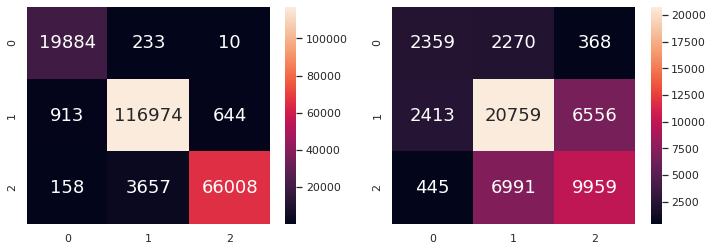

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import classification_report

# Extract Response and Predictors
yui_land = pd.DataFrame(df3['damage_grade'])
Xui_land = pd.DataFrame(numtrain)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xui_land, yui_land, test_size = no)

#Best number for depth of decision trees
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': [2,4,None],
               'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt', 'log2']}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(),
                                 tree_params)                  

locally_best_tree.fit(X_train, y_train)
print("Best parameters:", locally_best_tree.best_params_)


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = locally_best_tree.best_params_['max_depth'],
                                 criterion = locally_best_tree.best_params_['criterion'],
                                 max_features = locally_best_tree.best_params_['max_features'])  # create the decision tree object
# train the decision tree model
dectree.fit(X_train, y_train)                   

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

#Classification Metrics
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#Categorical Data

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto'}
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5853770847223488

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5780698388334612

              precision    recall  f1-score   support

           1       0.60      0.27      0.37     20067
           2       0.59      0.94      0.72    118660
           3       0.55      0.07      0.13     69754

    accuracy                           0.59    208481
   macro avg       0.58      0.43      0.41    208481
weighted avg       0.58      0.59      0.49    208481

              precision    recall  f1-score   support

           1       0.56      0.26      0.35      5057
           2       0.58      0.93      0.72     29599
           3       0.52      0.07      0.12     17464

    accuracy                           0.58     52120
   macro avg       0.55      0.42 

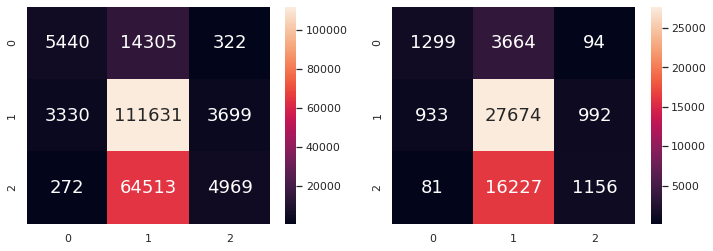

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import classification_report

# Extract Response and Predictors
yui_land = pd.DataFrame(df3['damage_grade'])
Xui_land = pd.DataFrame(xingdata)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xui_land, yui_land, test_size = no)

#Best number for depth of decision trees
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': [2,4,None],
               'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt', 'log2']}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(),
                                 tree_params)                  

locally_best_tree.fit(X_train, y_train)
print("Best parameters:", locally_best_tree.best_params_)


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = locally_best_tree.best_params_['max_depth'],
                                 criterion = locally_best_tree.best_params_['criterion'],
                                 max_features = locally_best_tree.best_params_['max_features'])  # create the decision tree object
# train the decision tree model
dectree.fit(X_train, y_train)                   

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

#Classification Metrics
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Extra Trees


In [0]:
#Extra Trees

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.3min finished


Best params: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto'}

('geo_level_1_id', 0.14853408569523674)
('geo_level_2_id', 0.1371706757273415)
('geo_level_3_id', 0.15520611029443832)
('count_floors_pre_eq', 0.027398834903217505)
('age', 0.1673314355481698)
('area_percentage', 0.1589448781474828)
('height_percentage', 0.07024046912531139)
('has_superstructure_adobe_mud', 0.008797126523022898)
('has_superstructure_mud_mortar_stone', 0.01953352819455669)
('has_superstructure_stone_flag', 0.005432735956019159)
('has_superstructure_cement_mortar_stone', 0.003267111630610886)
('has_superstructure_mud_mortar_brick', 0.007193818142745078)
('has_superstructure_cement_mortar_brick', 0.016266428887391562)
('has_superstructure_timber', 0.008752446093443542)
('has_superstructure_bamboo', 0.005889523518558393)
('has_superstructure_rc_non_engineered', 0.0082683205857227)
('has_superstructure_rc_engineered', 0.010084937622253837)
('has_superstructure_other', 0.0031714927304074187)
('cou

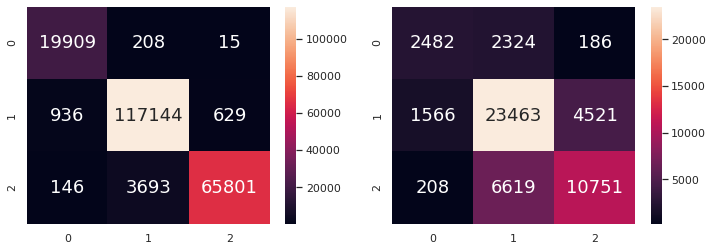

In [0]:
#PASS
# Extra Trees Classifier in Classifying and Singling out the most Important Variables
# Numtrain Data
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
y93sd = pd.DataFrame(df3['damage_grade'])
X93sd = pd.DataFrame(numtrain)
X_train, X_test, y_train, y_test = train_test_split(X93sd, y93sd, test_size = no)

# Create a random forest classifier
etc = ExtraTreesClassifier(n_estimators=10, n_jobs=-1)

# Train the classifier
etc.fit(X_train, y_train.values.ravel())

#Search for Best Params
forest_params = {'max_depth': [10,12,None],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'criterion' :['gini', 'entropy']}
locally_best_forest = GridSearchCV(
    ExtraTreesClassifier(n_estimators=10),
    forest_params, #cv=3, 
    verbose=1, n_jobs = -1)

locally_best_forest.fit(X_train, y_train.values.ravel())
print("Best params:", locally_best_forest.best_params_)
print()

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, etc.feature_importances_):
    print(feature)

# Create a new random forest classifier for the most important features
etcnew = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, criterion = locally_best_forest.best_params_['criterion'], 
                                       max_depth = None,
                                       max_features = locally_best_forest.best_params_['max_features'])

# Train the new classifier on the new dataset containing the most important features
etcnew.fit(X_train, y_train.values.ravel())


# Apply The Full Featured Classifier To The Test Data
y_train_pred= etcnew.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = etcnew.predict(X_test)



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#Categorical 

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   47.7s finished


Best params: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto'}

('land_surface_condition_o', 0.0107943218908041)
('land_surface_condition_t', 0.02289040130299143)
('foundation_type_i', 0.019874532204373067)
('foundation_type_r', 0.24501573290976075)
('foundation_type_u', 0.03286978628501766)
('foundation_type_w', 0.0604940609466993)
('roof_type_q', 0.04029505773967109)
('roof_type_x', 0.09446545383930681)
('ground_floor_type_m', 0.005661523999708143)
('ground_floor_type_v', 0.20350997033378168)
('ground_floor_type_x', 0.019291274128759913)
('ground_floor_type_z', 0.009694484911112519)
('other_floor_type_q', 0.07145818674021452)
('other_floor_type_s', 0.034073294001334256)
('other_floor_type_x', 0.024548901385248425)
('position_o', 0.00553803376584965)
('position_s', 0.023219086954488734)
('position_t', 0.028452217737291865)
('plan_configuration_c', 0.0027922850224897304)
('plan_configuration_d', 0.010559978448399454)
('plan_configuration_f', 0.0005834822858608808)
('plan_c

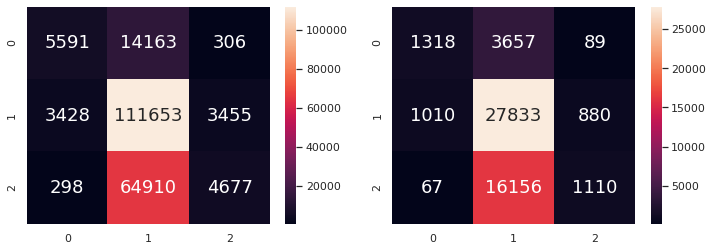

In [0]:
#PASS
# Extra Trees Classifier in Classifying and Singling out the most Important Variables
# Numtrain Data
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
y93sd = pd.DataFrame(df3['damage_grade'])
X93sd = pd.DataFrame(xingdata)
X_train, X_test, y_train, y_test = train_test_split(X93sd, y93sd, test_size = no)

# Create a random forest classifier
etc = ExtraTreesClassifier(n_estimators=10, n_jobs=-1)

# Train the classifier
etc.fit(X_train, y_train.values.ravel())

#Search for Best Params
forest_params = {'max_depth': [10,12,None],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'criterion' :['gini', 'entropy']}
locally_best_forest = GridSearchCV(
    ExtraTreesClassifier(n_estimators=10),
    forest_params, #cv=3, 
    verbose=1, n_jobs = -1)

locally_best_forest.fit(X_train, y_train.values.ravel())
print("Best params:", locally_best_forest.best_params_)
print()

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, etc.feature_importances_):
    print(feature)

# Create a new random forest classifier for the most important features
etcnew = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, criterion = locally_best_forest.best_params_['criterion'], 
                                       max_depth = None,
                                       max_features = locally_best_forest.best_params_['max_features'])

# Train the new classifier on the new dataset containing the most important features
etcnew.fit(X_train, y_train.values.ravel())


# Apply The Full Featured Classifier To The Test Data
y_train_pred= etcnew.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = etcnew.predict(X_test)



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Random Forest

In [0]:
#Random Forest

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.4min finished


Best params: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}

('geo_level_1_id', 0.15594864675518305)
('geo_level_2_id', 0.16580648883319893)
('geo_level_3_id', 0.19504306495536347)
('count_floors_pre_eq', 0.020868921526838)
('age', 0.137915503942779)
('area_percentage', 0.12832401081371167)
('height_percentage', 0.05845331772604816)
('has_superstructure_adobe_mud', 0.00849962720966162)
('has_superstructure_mud_mortar_stone', 0.02149380155880961)
('has_superstructure_stone_flag', 0.005704440387017952)
('has_superstructure_cement_mortar_stone', 0.003768090887492006)
('has_superstructure_mud_mortar_brick', 0.007224129453005948)
('has_superstructure_cement_mortar_brick', 0.012084197118671754)
('has_superstructure_timber', 0.011084947991193422)
('has_superstructure_bamboo', 0.006412080967874073)
('has_superstructure_rc_non_engineered', 0.007428368099270287)
('has_superstructure_rc_engineered', 0.007339034814351197)
('has_superstructure_other', 0.0037282360519854097)
('coun

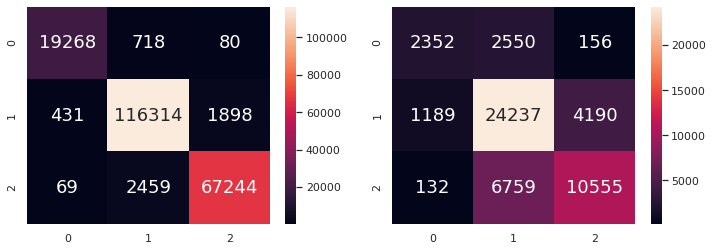

In [0]:
#Testing BUut PASSED
# Random Forest Classifyer in Classifying and Singling out the most Important Variables
# Numtrain Data
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
y93sd = pd.DataFrame(df3['damage_grade'])
X93sd = pd.DataFrame(numtrain)
X_train, X_test, y_train, y_test = train_test_split(X93sd, y93sd, test_size = no)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train.values.ravel())

#Search for Best Params
forest_params = {'max_depth': [10,12,None],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'criterion' :['gini', 'entropy']}
locally_best_forest = GridSearchCV(
    RandomForestClassifier(n_estimators=10),
    forest_params, #cv=3, 
    verbose=1, n_jobs = -1)

locally_best_forest.fit(X_train, y_train.values.ravel())
print("Best params:", locally_best_forest.best_params_)
print()

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, clf.feature_importances_):
    print(feature)

# Create a new random forest classifier for the most important features
clfnew = RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion = locally_best_forest.best_params_['criterion'], 
                                       max_depth = locally_best_forest.best_params_['max_depth'],
                                       max_features = locally_best_forest.best_params_['max_features'])

# Train the new classifier on the new dataset containing the most important features
clfnew.fit(X_train, y_train.values.ravel())
Xy_train = X_train

# Apply The Full Featured Classifier To The Test Data
y_train_pred= clfnew.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = clfnew.predict(X_test)

from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(X_test)
StandardScaler().fit_transform(X_train)

print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


[(0.19487288341513384, 'geo_level_3_id'), (0.16643383810406587, 'geo_level_2_id'), (0.15523111619823796, 'geo_level_1_id'), (0.13299721391796201, 'age'), (0.12766747684764362, 'area_percentage'), (0.061288961320426716, 'height_percentage'), (0.02509637425700529, 'count_families'), (0.022072975511856774, 'count_floors_pre_eq'), (0.02134720199130222, 'has_superstructure_mud_mortar_stone'), (0.012560198193243036, 'has_superstructure_cement_mortar_brick'), (0.011263235429391715, 'has_superstructure_timber'), (0.009576747299508873, 'has_superstructure_adobe_mud'), (0.007621063755382359, 'has_superstructure_rc_engineered'), (0.007450849002175232, 'has_superstructure_rc_non_engineered'), (0.00714943988394726, 'has_superstructure_mud_mortar_brick'), (0.006645544354790365, 'has_superstructure_bamboo'), (0.006500277027985813, 'has_superstructure_stone_flag'), (0.005900568738353677, 'has_secondary_use'), (0.0038803622709088106, 'has_superstructure_cement_mortar_stone'), (0.0038374011822184073, 'h

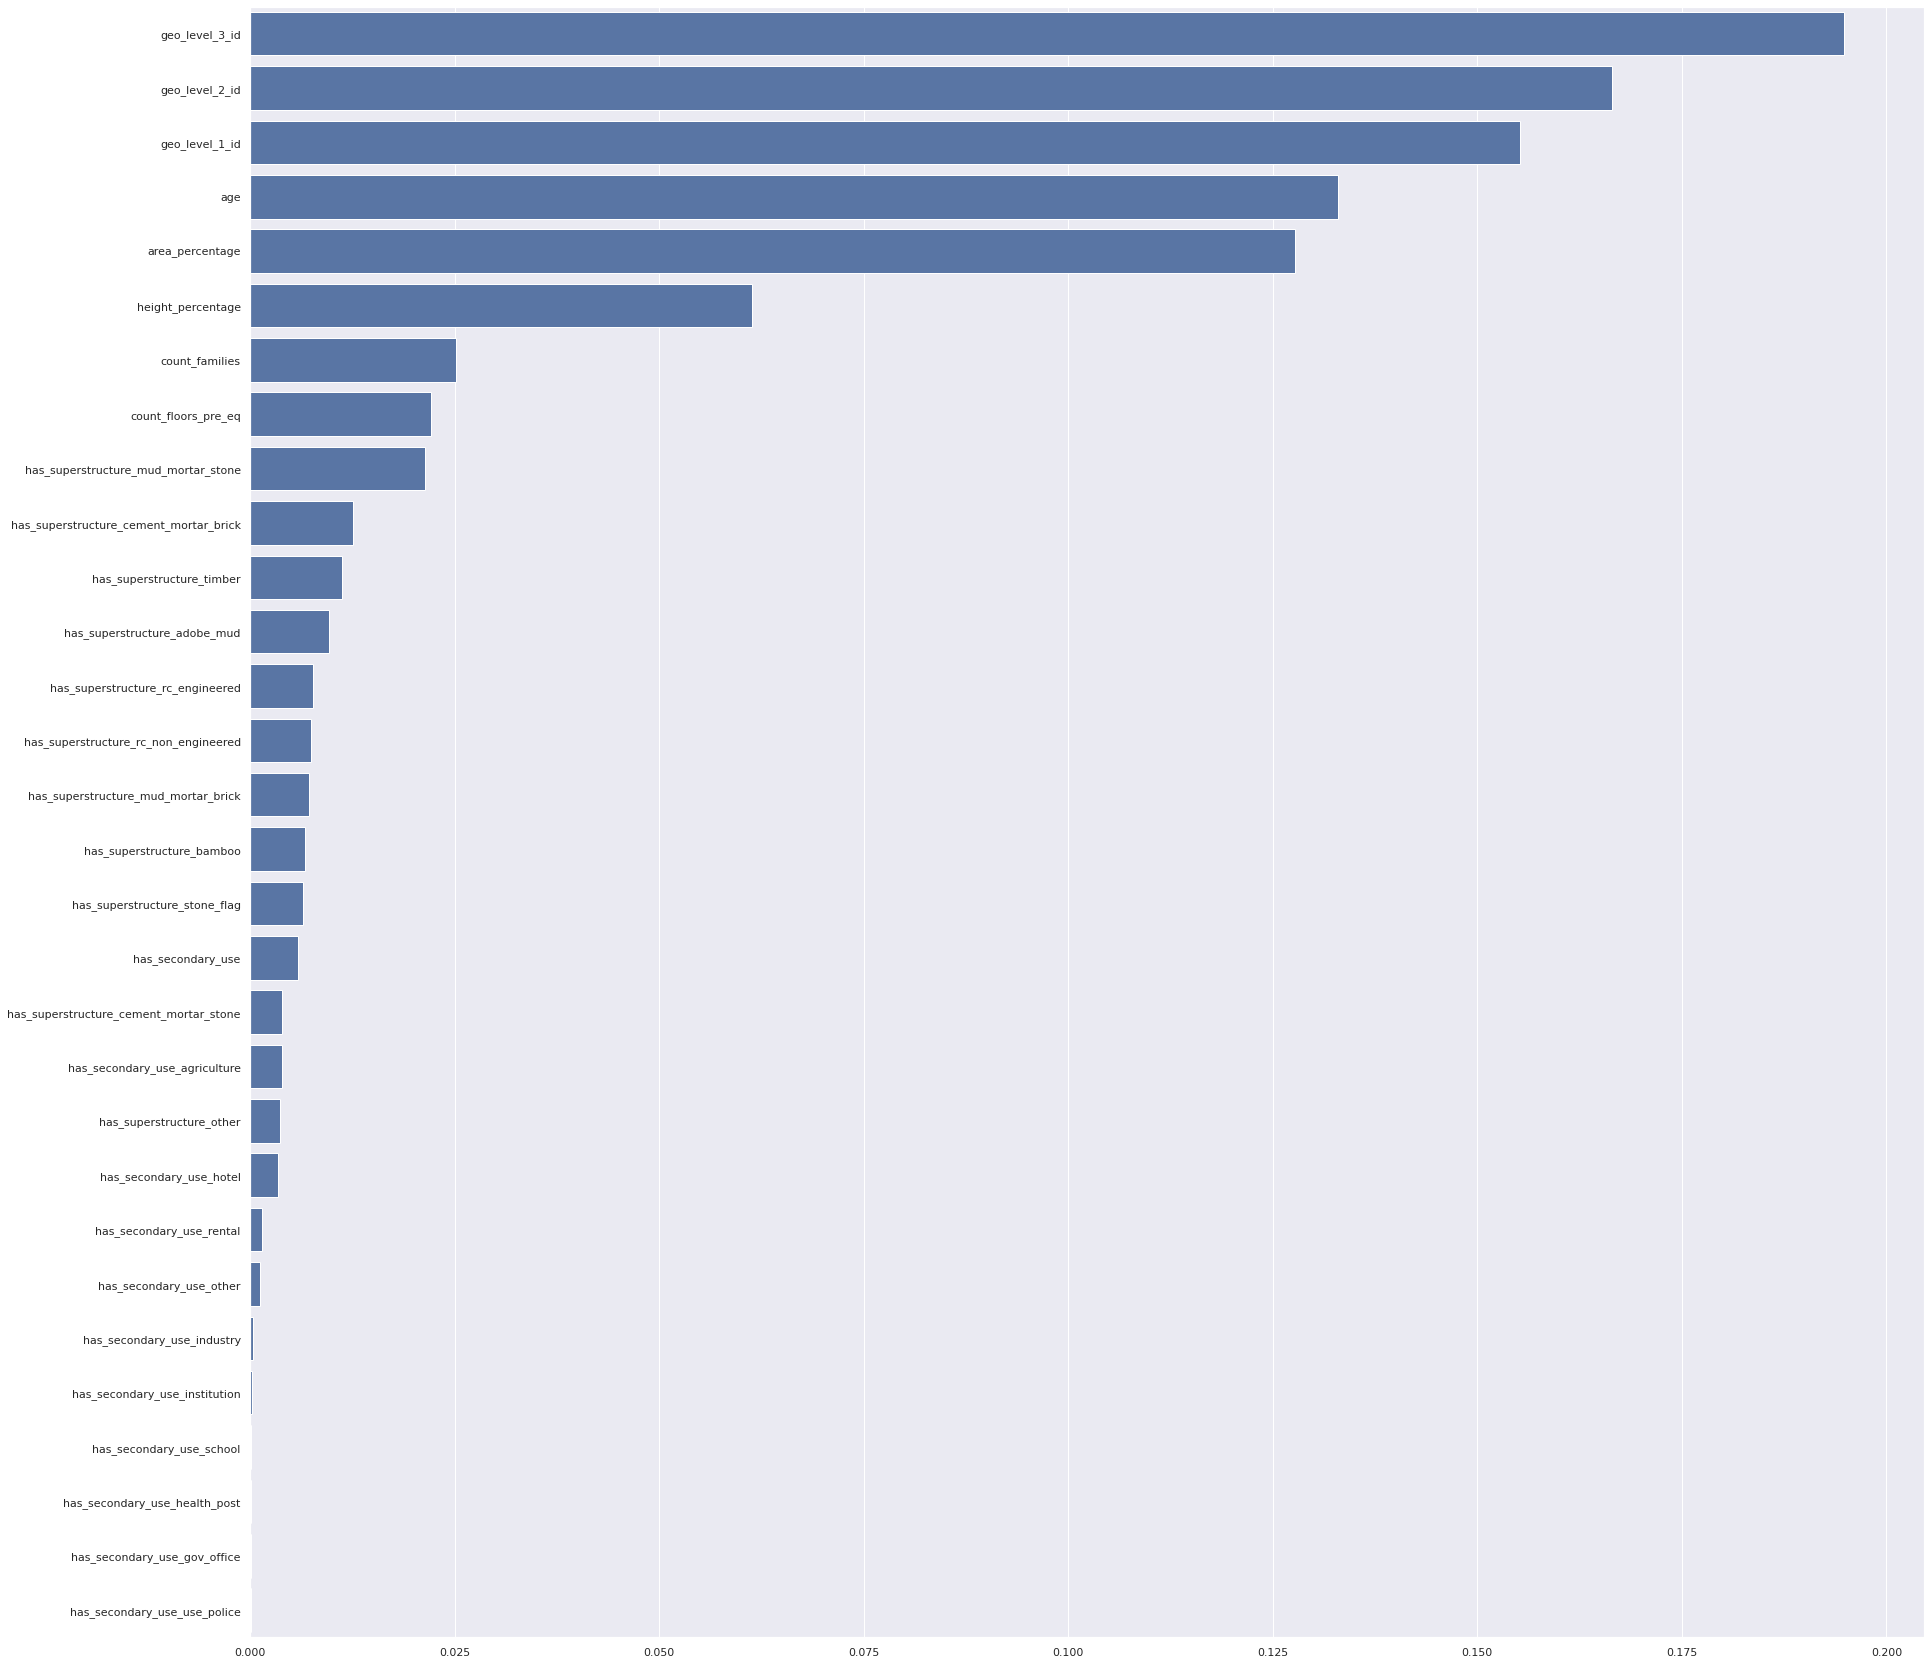

In [0]:
diktionary = dict(zip(clfnew.feature_importances_, Xy_train.columns))
dic = sorted(diktionary.items(), reverse = True)
print(dic)
newlist = []
for k,v in dic:
  newlist.append(v) 

f, axes = plt.subplots(1, 1, figsize=(30, 30))
count = 0
sb.barplot(y = Xy_train.columns, x = clfnew.feature_importances_, color = 'b', order = newlist)

In [0]:
#Categorical Data

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   41.8s finished


Best params: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt'}

('land_surface_condition_o', 0.014323511521240777)
('land_surface_condition_t', 0.02889368958857793)
('foundation_type_i', 0.051725771238433325)
('foundation_type_r', 0.21443568840234775)
('foundation_type_u', 0.03296983507776209)
('foundation_type_w', 0.05286349425461869)
('roof_type_q', 0.046625964113746005)
('roof_type_x', 0.11607747135264966)
('ground_floor_type_m', 0.0068953152556079375)
('ground_floor_type_v', 0.13658686871918566)
('ground_floor_type_x', 0.02304730647433628)
('ground_floor_type_z', 0.008600156182526518)
('other_floor_type_q', 0.089713528707492)
('other_floor_type_s', 0.03209746982175229)
('other_floor_type_x', 0.02328079758002653)
('position_o', 0.008459391939053458)
('position_s', 0.02513907847696285)
('position_t', 0.03164950585395795)
('plan_configuration_c', 0.003129326725074763)
('plan_configuration_d', 0.013110149796757986)
('plan_configuration_f', 0.0005559471449535467)
('plan_

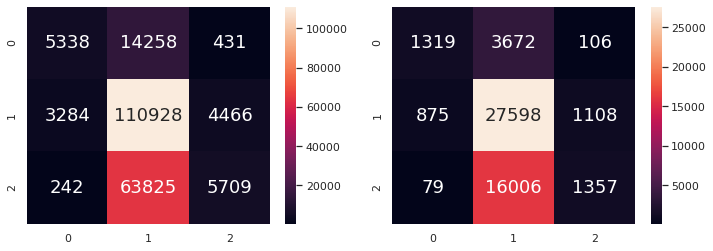

In [0]:
#Testing BUut PASSED

# Numtrain Data
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
y93sd = pd.DataFrame(df3['damage_grade'])
X93sd = pd.DataFrame(xingdata)
X_train, X_test, y_train, y_test = train_test_split(X93sd, y93sd, test_size = no)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train.values.ravel())

#Search for Best Params
forest_params = {'max_depth': [10,12,None],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'criterion' :['gini', 'entropy']}
locally_best_forest = GridSearchCV(
    RandomForestClassifier(n_estimators=10),
    forest_params, #cv=3, 
    verbose=1, n_jobs = -1)

locally_best_forest.fit(X_train, y_train.values.ravel())
print("Best params:", locally_best_forest.best_params_)
print()

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, clf.feature_importances_):
    print(feature)

# Create a new random forest classifier for the most important features
clfnew = RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion = locally_best_forest.best_params_['criterion'], 
                                       max_depth = None ,
                                       max_features = locally_best_forest.best_params_['max_features'])

# Train the new classifier on the new dataset containing the most important features
clfnew.fit(X_train, y_train.values.ravel())

estimator = clfnew.estimators_[5]

# Apply The Full Featured Classifier To The Test Data
y_train_pred= clfnew.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = clfnew.predict(X_test)



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [0]:
#One of the Best Models I have

In [0]:
# Sample Random Forest from new Data
# https://github.com/SAR2652/Richter-s-Predictor-Modeling-Earthquake-Damage/blob/master/new_solution.ipynb
# All credits go to him

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.2min finished


Best params: {'criterion': 'entropy', 'max_features': 'sqrt'}

('has_superstructure_adobe_mud', 0.007188724268655617)
('has_superstructure_mud_mortar_stone', 0.011445998871882765)
('has_superstructure_stone_flag', 0.004514160415124656)
('has_superstructure_cement_mortar_stone', 0.0028966568740686933)
('has_superstructure_mud_mortar_brick', 0.005792878829105097)
('has_superstructure_cement_mortar_brick', 0.008760599179580266)
('has_superstructure_timber', 0.013083883473509948)
('has_superstructure_bamboo', 0.006465028196272075)
('has_superstructure_rc_non_engineered', 0.00439150075881052)
('has_superstructure_rc_engineered', 0.002027996798055194)
('has_superstructure_other', 0.003271499277822725)
('has_secondary_use', 0.007667404912048667)
('has_secondary_use_agriculture', 0.005138250523226614)
('has_secondary_use_hotel', 0.003564328350207699)
('has_secondary_use_rental', 0.0011420040057708847)
('has_secondary_use_institution', 0.00021642744428604973)
('has_secondary_use_school', 9.5986

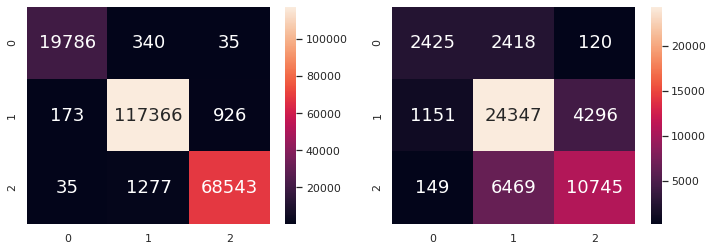

In [0]:
#Testing BUut PASSED
# Random Forest Classifyer in Classifying and Singling out the most Important Variables
# Numtrain Data
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

X = pd.DataFrame(df3)
y = df3['damage_grade']
y = y.values.ravel()

age = X['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X['age'] = age.T


floors = X['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X['count_floors_pre_eq'] = floors.T



ap = X['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X.drop(['area_percentage'], axis = 1, inplace = True)
X['area_percentage'] = ap.T



hp = X['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X.drop(['height_percentage'], axis = 1, inplace = True)
X['height_percentage'] = hp.T


cuts = pd.cut(X['geo_level_1_id'], 21)
X.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_1_id'] = cuts.T



cuts = pd.cut(X['geo_level_2_id'], 23)
X.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_2_id'] = cuts.T

temp = X['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X.drop(['geo_level_3_id'], axis = 1, inplace = True)
X['geo_level_3_id'] = temp.T


cf = X['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X.drop(['count_families'], axis = 1, inplace = True)
X['count_families'] = np.array(cf_new).T


category_cols = ['geo_level_1_id', 'geo_level_2_id', 'roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
X = pd.get_dummies(X, columns = category_cols)
X.drop(['damage_grade'], axis=1 ,inplace=True)
X.drop(['building_id'], axis=1 ,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = no)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=20, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

#Search for Best Params
forest_params = {
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'criterion' :['gini', 'entropy']}
locally_best_forest = GridSearchCV(
    RandomForestClassifier(n_estimators=20),
    forest_params, cv=3, 
    verbose=1, n_jobs = -1)

locally_best_forest.fit(X_train, y_train)
print("Best params:", locally_best_forest.best_params_)
print()

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, clf.feature_importances_):
    print(feature)

# Create a new random forest classifier for the most important features
clfnew = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion = locally_best_forest.best_params_['criterion'], 
                                       max_depth = None,
                                       max_features = locally_best_forest.best_params_['max_features'])

# Train the new classifier on the new dataset containing the most important features
clfnew.fit(X_train, y_train)
Xy_train = X_train

# Apply The Full Featured Classifier To The Test Data
y_train_pred= clfnew.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = clfnew.predict(X_test)



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
# Random Forest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:   14.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    3.7s finished


Classsification Metrics for Train Data:

              precision    recall  f1-score   support

           1       0.99      0.98      0.99     19954
           2       0.99      0.99      0.99    118772
           3       0.99      0.98      0.98     69754

    accuracy                           0.99    208480
   macro avg       0.99      0.98      0.99    208480
weighted avg       0.99      0.99      0.99    208480


Classsification Metrics for Test Data:

              precision    recall  f1-score   support

           1       0.66      0.49      0.57      5170
           2       0.73      0.82      0.77     29487
           3       0.71      0.62      0.66     17464

    accuracy                           0.72     52121
   macro avg       0.70      0.64      0.67     52121
weighted avg       0.72      0.72      0.71     52121




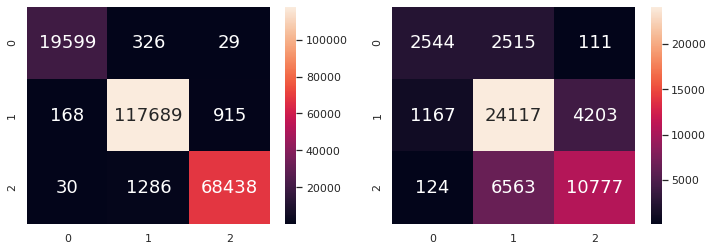

In [0]:

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

X = pd.DataFrame(df3)
y = df3['damage_grade']
y = y.values.ravel()

age = X['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X['age'] = age.T


floors = X['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X['count_floors_pre_eq'] = floors.T



ap = X['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X.drop(['area_percentage'], axis = 1, inplace = True)
X['area_percentage'] = ap.T



hp = X['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X.drop(['height_percentage'], axis = 1, inplace = True)
X['height_percentage'] = hp.T


cuts = pd.cut(X['geo_level_1_id'], 21)
X.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_1_id'] = cuts.T



cuts = pd.cut(X['geo_level_2_id'], 23)
X.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_2_id'] = cuts.T

temp = X['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X.drop(['geo_level_3_id'], axis = 1, inplace = True)
X['geo_level_3_id'] = temp.T


cf = X['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X.drop(['count_families'], axis = 1, inplace = True)
X['count_families'] = np.array(cf_new).T


category_cols = ['geo_level_1_id', 'geo_level_2_id', 'roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
X = pd.get_dummies(X, columns = category_cols)
X.drop(['damage_grade'], axis=1 ,inplace=True)
X.drop(['building_id'], axis=1 ,inplace=True)

X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfx = RandomForestClassifier(n_estimators = 300,n_jobs=-1,verbose=1)

rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# K Nearest Neighbour

In [0]:
#KNN #loky Backend

Train Size: 208481
Testing Size: 52120
Total Size: 260601
kvalue:    Accuracy Score 
1         0.6662701458173446
kvalue:    Accuracy Score 
2         0.6697429009976976
kvalue:    Accuracy Score 
3         0.6860706062931696
kvalue:    Accuracy Score 
4         0.6920759785111281
kvalue:    Accuracy Score 
5         0.6979278587874137
kvalue:    Accuracy Score 
6         0.6998081350729086
kvalue:    Accuracy Score 
7         0.7030506523407521
kvalue:    Accuracy Score 
8         0.703914044512663
kvalue:    Accuracy Score 
9         0.7057559478127399
kvalue:    Accuracy Score 
10         0.706792018419033
kvalue:    Accuracy Score 
11         0.7068879508825787
kvalue:    Accuracy Score 
12         0.707655410590944
kvalue:    Accuracy Score 
13         0.7077321565617805
kvalue:    Accuracy Score 
14         0.7083269378357636
kvalue:    Accuracy Score 
15         0.7077897160399079
kvalue:    Accuracy Score 
16         0.7079815809669993
kvalue:    Accuracy Score 
17         0.70

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.9min finished


Best params: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}

Accuracy score for the new selected train data 0.7706217832800111
Accuracy score for the new selected test data: 0.717632386799693

Classsification Metrics for Train Data:

              precision    recall  f1-score   support

           1       0.69      0.59      0.64     20030
           2       0.77      0.88      0.82    118791
           3       0.80      0.64      0.71     69660

    accuracy                           0.77    208481
   macro avg       0.75      0.70      0.72    208481
weighted avg       0.77      0.77      0.77    208481


Classsification Metrics for Test Data:

              precision    recall  f1-score   support

           1       0.61      0.51      0.56      5094
           2       0.72      0.84      0.78     29468
           3       0.74      0.58      0.65     17558

    accuracy                           0.72     52120
   macro avg       0.69      0.64      0.66     52120
w

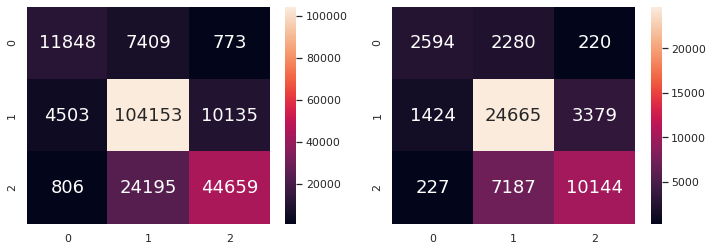

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = pd.DataFrame(numtrain)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, weights="distance", algorithm="auto",n_jobs=-1)
  knn.fit(X_train,y_train.values.ravel())
  y_pred=knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))
  print("kvalue:"+ "    Accuracy Score ")
  print(k,"       ", scores_list[k-1])




from sklearn.model_selection import GridSearchCV
grid_params = {'n_neighbors':[n for n in range(1,26)],
               'weights':['uniform','distance'],
               'metric':['euclidean','manhattan']}
knn_grid = GridSearchCV(KNeighborsClassifier(),grid_params,verbose = 1,cv=3,n_jobs=-1)
knn_grid_results = knn_grid.fit(X_train, y_train.values.ravel())

print("Best params:", knn_grid_results.best_params_)

# Create a new random forest classifier for the most important features
knn_new = KNeighborsClassifier(metric = knn_grid_results.best_params_['metric'],
                              n_neighbors = knn_grid_results.best_params_['n_neighbors'],
                              weights = knn_grid_results.best_params_['weights'],
                              algorithm = 'auto',n_jobs=-1)
# Train the new classifier on the new dataset containing the most important features
knn_new.fit(X_train, y_train.values.ravel())


# Apply The Full Featured Classifier To The Test Data
y_train_pred= knn_new.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = knn_new.predict(X_test)



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",metrics.accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0, 0.5, 'Testing Accuracy'), Text(0.5, 0, 'Value for K for KNN')]

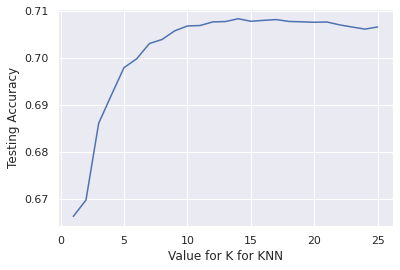

In [0]:
#KNN k_value vs Accuracy
chikiri = sb.lineplot(x = k_range, y = scores_list)
chikiri.set(xlabel = "Value for K for KNN" , ylabel = "Testing Accuracy")


In [0]:
#KNN with new inputs long processing time so Error

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Extract Response and Predictors
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

X = pd.DataFrame(df3)
y = df3['damage_grade']


age = X['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X['age'] = age.T


floors = X['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X['count_floors_pre_eq'] = floors.T



ap = X['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X.drop(['area_percentage'], axis = 1, inplace = True)
X['area_percentage'] = ap.T



hp = X['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X.drop(['height_percentage'], axis = 1, inplace = True)
X['height_percentage'] = hp.T


cuts = pd.cut(X['geo_level_1_id'], 21)
X.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_1_id'] = cuts.T



cuts = pd.cut(X['geo_level_2_id'], 23)
X.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_2_id'] = cuts.T

temp = X['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X.drop(['geo_level_3_id'], axis = 1, inplace = True)
X['geo_level_3_id'] = temp.T


cf = X['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X.drop(['count_families'], axis = 1, inplace = True)
X['count_families'] = np.array(cf_new).T


category_cols = ['geo_level_1_id', 'geo_level_2_id', 'roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
X = pd.get_dummies(X, columns = category_cols)
X.drop(['damage_grade'], axis=1 ,inplace=True)
X.drop(['building_id'], axis=1 ,inplace=True)


# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = no, random_state=42)


k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, weights="distance", algorithm="auto",n_jobs=-1)
  knn.fit(X_train,y_train.values.ravel())
  y_pred=knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))
  print("kvalue:"+ "    Accuracy Score ")
  print(k,"       ", scores_list[k-1])




from sklearn.model_selection import GridSearchCV
grid_params = {'n_neighbors':[n for n in range(1,26)],
               'weights':['uniform','distance'],
               'metric':['euclidean','manhattan']}
knn_grid = GridSearchCV(KNeighborsClassifier(),grid_params,verbose = 1,cv=3,n_jobs=-1)
knn_grid_results = knn_grid.fit(X_train, y_train.values.ravel())

print("Best params:", knn_grid_results.best_params_)

# Create a new random forest classifier for the most important features
knn_new = KNeighborsClassifier(metric = knn_grid_results.best_params_['metric'],
                              n_neighbors = knn_grid_results.best_params_['n_neighbors'],
                              weights = knn_grid_results.best_params_['weights'],
                              algorithm = 'auto',n_jobs=-1)
# Train the new classifier on the new dataset containing the most important features
knn_new.fit(X_train, y_train.values.ravel())


# Apply The Full Featured Classifier To The Test Data
y_train_pred= knn_new.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = knn_new.predict(X_test)



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",metrics.accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Train Size: 208481
Testing Size: 52120
Total Size: 260601


KeyboardInterrupt: ignored

# Naive Bayes

In [0]:
# Naive Bayes

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4351139912030353

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4351304681504221

Accuracy: 0.4351304681504221
              precision    recall  f1-score   support

           1       0.37      0.50      0.42     20230
           2       0.66      0.19      0.29    118517
           3       0.40      0.84      0.54     69734

    accuracy                           0.44    208481
   macro avg       0.47      0.51      0.42    208481
weighted avg       0.54      0.44      0.39    208481

              precision    recall  f1-score   support

           1       0.35      0.49      0.41      4894
           2       0.66      0.19      0.29     29742
           3       0.40      0.84      0.54     17484

    accuracy                           0.44     52120
   macro avg       0.47      0.51      0.41     52120
weighted avg       0.55      0.44

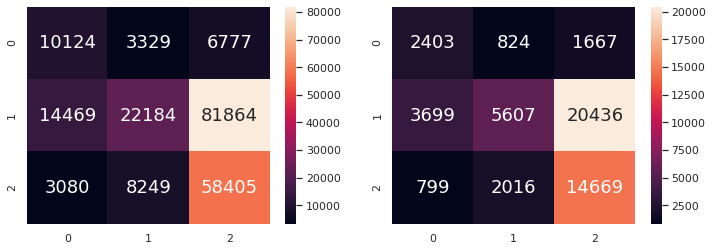

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report


# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = pd.DataFrame(numtrain)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gnb.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gnb.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#Multinomial Naive Bayes

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.26634561422863473

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.2666922486569455

Accuracy: 0.2666922486569455
              precision    recall  f1-score   support

           1       0.12      0.56      0.20     20128
           2       0.61      0.09      0.16    118666
           3       0.35      0.48      0.41     69687

    accuracy                           0.27    208481
   macro avg       0.36      0.38      0.25    208481
weighted avg       0.48      0.27      0.24    208481

              precision    recall  f1-score   support

           1       0.12      0.55      0.19      4996
           2       0.62      0.09      0.16     29593
           3       0.36      0.48      0.41     17531

    accuracy                           0.27     52120
   macro avg       0.36      0.38      0.25     52120
weighted avg       0.48      0.2

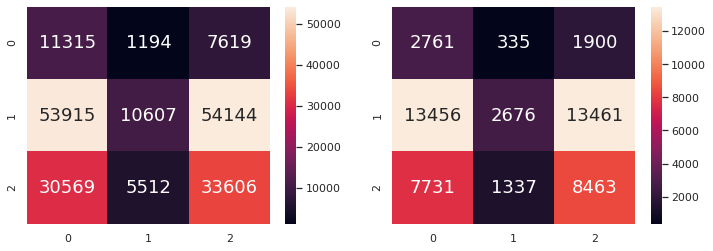

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report


# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = pd.DataFrame(numtrain)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
mnb = MultinomialNB()
mnb.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = mnb.predict(X_train)
y_test_pred = mnb.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", mnb.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", mnb.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Linear Models

In [0]:
#Passive Aggressive Classifier

Train Size: 208481
Testing Size: 52120
Total Size: 260601
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.03, NNZs: 30, Bias: 0.002562, T: 208481, Avg. loss: 0.902476
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 30, Bias: -0.003262, T: 208481, Avg. loss: 1.950044
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 30, Bias: -0.008647, T: 208481, Avg. loss: 1.630095
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 30, Bias: -0.006061, T: 416962, Avg. loss: 1.956659
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 30, Bias: 0.005797, T: 416962, Avg. loss: 0.901191
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 30, Bias: -0.013362, T: 416962, Avg. loss: 1.623118
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 30, Bias: -0.007780, T: 625443, Avg. loss: 1.961875
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 30, Bias: 0.007998, T: 625443, Avg. loss: 0.886973
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 30, Bias: -0.018537, T: 625443, Avg. loss: 1.617054
Total

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


Accuracy score for the new selected train data 0.34894786575275444
Accuracy score for the new selected test data: 0.3479662317728319

Classsification Metrics for Train Data:

              precision    recall  f1-score   support

           1       0.42      0.01      0.01     20008
           2       0.60      0.04      0.08    118735
           3       0.34      0.97      0.50     69738

    accuracy                           0.35    208481
   macro avg       0.45      0.34      0.20    208481
weighted avg       0.49      0.35      0.21    208481


Classsification Metrics for Test Data:

              precision    recall  f1-score   support

           1       0.39      0.01      0.01      5116
           2       0.57      0.04      0.07     29524
           3       0.34      0.97      0.50     17480

    accuracy                           0.35     52120
   macro avg       0.43      0.34      0.20     52120
weighted avg       0.47      0.35      0.21     52120




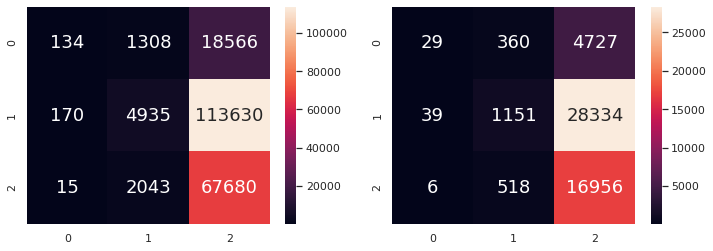

In [0]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = pd.DataFrame(numtrain)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)

#Linear Model PA Classifier
linear_clf = PassiveAggressiveClassifier(n_jobs=-1,verbose=1,max_iter=999999999,fit_intercept=True)

#Fit the Model
linear_clf.fit(X_train, y_train.values.ravel())

#Predicting the Model 
y_train_pred = linear_clf.predict(X_train)
y_test_pred = linear_clf.predict(X_test)



# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",metrics.accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#Passive Aggressive Classifier (See below Comment)

In [0]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = pd.DataFrame(numtrain)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)

#Linear Model PA Classifier
linear_clf = PassiveAggressiveClassifier(n_jobs=-1,verbose=1,max_iter=999999999,fit_intercept=True)

#Fit the Model
linear_clf.fit(X_train, y_train.values.ravel())

#Predicting the Model 
y_train_pred = linear_clf.predict(X_train)
y_test_pred = linear_clf.predict(X_test)



# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",metrics.accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Stochastic Gradient Descent 

In [0]:
#Stochastic Gradient Descent Classifier (Useless Linear Model Data is not Linear)

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Accuracy score for the new selected train data 0.14805665744120566
Accuracy score for the new selected test data: 0.14742900997697622

Classsification Metrics for Train Data:

              precision    recall  f1-score   support

           1       0.10      0.96      0.19     20134
           2       0.67      0.06      0.10    118567
           3       0.41      0.07      0.12     69780

    accuracy                           0.15    208481
   macro avg       0.39      0.36      0.14    208481
weighted avg       0.53      0.15      0.12    208481


Classsification Metrics for Test Data:

              precision    recall  f1-score   support

           1       0.10      0.95      0.18      4990
           2       0.67      0.06      0.10     29692
           3       0.42      0.07      0.13     17438

    accuracy                           0.15     52120
   macro avg       0.40      0.36      0.14     52120
weighted avg      

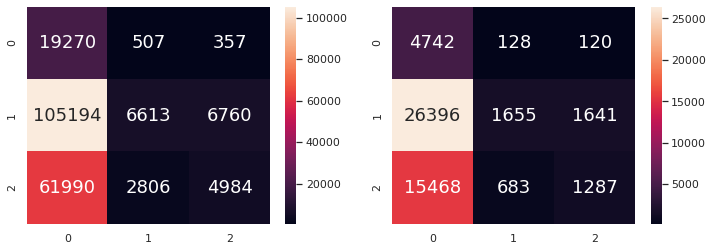

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = pd.DataFrame(numtrain)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)

#Linear Model PA Classifier
linear_clf = SGDClassifier(max_iter=5000, n_jobs=-1, )

#Fit the Model
linear_clf.fit(X_train, y_train.values.ravel())

#Predicting the Model 
y_train_pred = linear_clf.predict(X_train)
y_test_pred = linear_clf.predict(X_test)



# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",metrics.accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Gradient Boosting Classifiers

In [0]:
#AdaBoostClassifier

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6514502520613389

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6509209516500384

Accuracy: 0.6509209516500384
              precision    recall  f1-score   support

           1       0.57      0.33      0.42     20045
           2       0.65      0.86      0.74    118642
           3       0.69      0.40      0.50     69794

    accuracy                           0.65    208481
   macro avg       0.64      0.53      0.55    208481
weighted avg       0.65      0.65      0.63    208481

              precision    recall  f1-score   support

           1       0.58      0.33      0.42      5079
           2       0.65      0.85      0.74     29617
           3       0.68      0.40      0.50     17424

    accuracy                           0.65     52120
   macro avg       0.64      0.53      0.55     52120
weighted avg       0.65      0.65

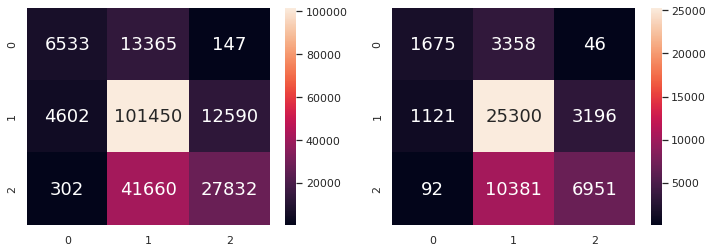

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report


# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = pd.DataFrame(numtrain)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = abc.predict(X_train)
y_test_pred = abc.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", abc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", abc.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#Gradient Boosting Classifier

Train Size: 208481
Testing Size: 52120
Total Size: 260601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6795151596548367

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6737145049884881

Accuracy: 0.6737145049884881
              precision    recall  f1-score   support

           1       0.63      0.36      0.46     20126
           2       0.67      0.86      0.75    118615
           3       0.71      0.47      0.57     69740

    accuracy                           0.68    208481
   macro avg       0.67      0.56      0.59    208481
weighted avg       0.68      0.68      0.66    208481

              precision    recall  f1-score   support

           1       0.61      0.34      0.44      4998
           2       0.67      0.86      0.75     29644
           3       0.71      0.46      0.56     17478

    accuracy                           0.67     52120
   macro avg       0.66      0.55      0.58     52120
weighted avg       0.68      0.67

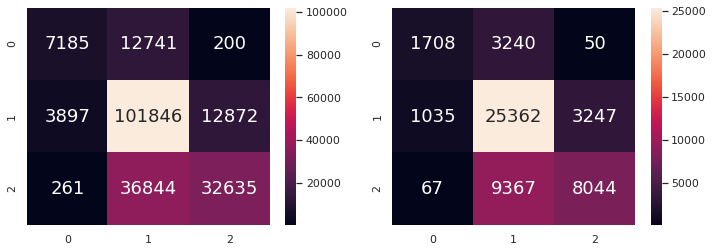

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report


# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = pd.DataFrame(numtrain)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)


#Create a Gaussian Classifier and #rain the model using the training sets
gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train.values.ravel())



#Predict the response for train & test dataset
y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gbc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gbc.score(X_test, y_test))
print()


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#Another good Algorithm using (Grading Boosting) Fast and High Accuracy with another set of new inputs

In [0]:
# https://github.com/LeadingIndiaAI/RICHTER-S-PREDICTOR-MODELING-EARTHQUAKE-DAMAGE/blob/master/nepal%20earthquake/Untitled.ipynb
traindata = pd.read_csv(urll,sep=',')
traindata.columns[traindata.isna().any()]
data=traindata
data.drop(['building_id'], axis=1, inplace=True)
trainlabels = pd.read_csv(url,sep=',')
trainout=trainlabels
trainout.drop(['building_id'], axis=1, inplace=True)
testvalues = pd.read_csv(url2,sep=',')
testdata=testvalues
testdata.drop(['building_id'], axis=1, inplace=True)

cleanup_letters = {"land_surface_condition": {"n": 1, "o": 2, "t":3},
                "foundation_type": {"h": 1, "i": 2, "r": 3, "u": 4, "w": 5},               
                "roof_type": {"n": 1, "q": 2, "x": 3},
                "ground_floor_type": {"f": 1, "m": 2, "v": 3, "x": 4, "z": 5},
                "other_floor_type": {"j": 1, "q": 2, "s": 3, "x": 4},
                "position": {"j": 1, "o": 2, "s": 3, "t": 4},
                "plan_configuration": {"a": 1, "c": 2, "d": 3, "f": 4, "m": 5, "n": 6, "o": 7, "q": 8, "s": 9, "u":10},
                "legal_ownership_status": {"a": 1, "r": 2, "v": 3, "w": 4}             
               }
data.replace(cleanup_letters, inplace=True)
testdata.replace(cleanup_letters, inplace=True)
a = list(data)
del a[-1]
x = data[a].values
y = trainout['damage_grade'].values
print('l')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('ll')
x_train.shape, y_train.shape, x_test.shape, y_test.shape
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

# The parameters to be fit--only n_estimators and learning rate
# have been varied here for simplicity
param_grid = {'n_estimators': [400],'learning_rate': [0.1]}
print("lll")
# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(subsample=0.5,max_features=25,random_state=42),param_grid=param_grid, scoring='accuracy',n_jobs=-1,verbose=1)
print("llll")
# Do the grid search
GV_GBC = GV_GBC.fit(x_train, y_train)

# The best model
print(GV_GBC.best_estimator_)  # this model is working best for  learning_rate=0.1 and n_estimators=400


#"""classification report"""
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_train_pred = GV_GBC.predict(x_train)
y_test_pred = GV_GBC.predict(x_test)
print(metrics.accuracy_score(y_test,y_test_pred))
print(y_train,y_train_pred)
print(classification_report(y_test, y_test_pred))

l
ll
lll
llll
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.9min finished


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=25, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.7066633410717369
[2 2 3 ... 2 3 2] [2 2 2 ... 2 2 2]
              precision    recall  f1-score   support

           1       0.70      0.40      0.51      5170
           2       0.70      0.86      0.77     29487
           3       0.73      0.55      0.63     17464

    accuracy                      

# CatBoost

In [0]:
#CatBooster for New inputs

In [0]:
!pip install catboost
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier   
from sklearn.metrics import accuracy_score

#Extract Response and Predictors
# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

X = pd.DataFrame(df3)
y = df3['damage_grade']

age = X['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X['age'] = age.T


floors = X['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X['count_floors_pre_eq'] = floors.T



ap = X['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X.drop(['area_percentage'], axis = 1, inplace = True)
X['area_percentage'] = ap.T



hp = X['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X.drop(['height_percentage'], axis = 1, inplace = True)
X['height_percentage'] = hp.T


cuts = pd.cut(X['geo_level_1_id'], 21)
X.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_1_id'] = cuts.T



cuts = pd.cut(X['geo_level_2_id'], 23)
X.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_2_id'] = cuts.T

temp = X['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X.drop(['geo_level_3_id'], axis = 1, inplace = True)
X['geo_level_3_id'] = temp.T


cf = X['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X.drop(['count_families'], axis = 1, inplace = True)
X['count_families'] = np.array(cf_new).T


category_cols = ['geo_level_1_id', 'geo_level_2_id', 'roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
X = pd.get_dummies(X, columns = category_cols)
X.drop(['damage_grade'], axis=1 ,inplace=True)
X.drop(['building_id'], axis=1 ,inplace=True)


X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = no)



#importing library and building model

catclf=CatBoostClassifier(iterations=10000, depth=None)#iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')

catclf.fit(X_train, y_train.values.ravel(),cat_features=None)

# Train the new classifier on the new dataset containing the most important features


# Apply The Full Featured Classifier To The Test Data
y_train_pred= catclf.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = catclf.predict(X_test)



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

catclf.get_feature_importance(data=None,
                       
                       prettified=True,
                       thread_count=-1,
                       verbose=False)



In [0]:
#CatBooster for Original Data Another Goood One

Streaming output truncated to the last 5000 lines.
5061:	learn: 0.6160885	total: 5m 33s	remaining: 5m 24s
5062:	learn: 0.6160852	total: 5m 33s	remaining: 5m 24s
5063:	learn: 0.6160699	total: 5m 33s	remaining: 5m 24s
5064:	learn: 0.6160619	total: 5m 33s	remaining: 5m 24s
5065:	learn: 0.6160540	total: 5m 33s	remaining: 5m 24s
5066:	learn: 0.6160497	total: 5m 33s	remaining: 5m 24s
5067:	learn: 0.6160451	total: 5m 33s	remaining: 5m 24s
5068:	learn: 0.6160311	total: 5m 33s	remaining: 5m 24s
5069:	learn: 0.6160237	total: 5m 33s	remaining: 5m 24s
5070:	learn: 0.6160184	total: 5m 33s	remaining: 5m 24s
5071:	learn: 0.6160076	total: 5m 33s	remaining: 5m 24s
5072:	learn: 0.6160041	total: 5m 33s	remaining: 5m 24s
5073:	learn: 0.6159951	total: 5m 33s	remaining: 5m 24s
5074:	learn: 0.6159890	total: 5m 33s	remaining: 5m 24s
5075:	learn: 0.6159797	total: 5m 33s	remaining: 5m 23s
5076:	learn: 0.6159709	total: 5m 34s	remaining: 5m 23s
5077:	learn: 0.6159636	total: 5m 34s	remaining: 5m 23s
5078:	learn: 0

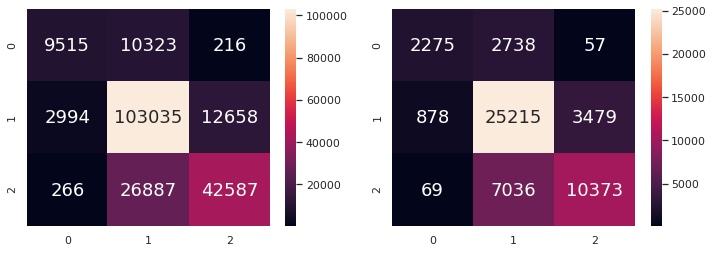

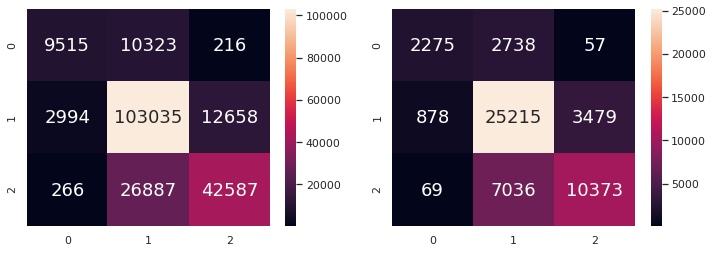

In [0]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Extract Response and Predictors
# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
y93sd = pd.DataFrame(df3['damage_grade'])
X93sd = pd.DataFrame(numtrain)
X_train, X_test, y_train, y_test = train_test_split(X93sd, y93sd, test_size = no)

#importing library and building model

catclf=CatBoostClassifier(iterations=10000,depth=None,verbose=1)#iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')

catclf.fit(X_train, y_train,cat_features=None)

# Train the new classifier on the new dataset containing the most important features


# Apply The Full Featured Classifier To The Test Data
y_train_pred= catclf.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = catclf.predict(X_test)



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [0]:
#has_superstructure_cement_mortar_brick vs damage_grade

Streaming output truncated to the last 5000 lines.
7:	learn: 1.0323081	total: 684ms	remaining: 7m 6s
8:	learn: 1.0256739	total: 775ms	remaining: 7m 9s
9:	learn: 1.0193412	total: 860ms	remaining: 7m 9s
10:	learn: 1.0132941	total: 943ms	remaining: 7m 7s
11:	learn: 1.0075176	total: 1.02s	remaining: 7m 6s
12:	learn: 1.0019981	total: 1.11s	remaining: 7m 5s
13:	learn: 0.9967225	total: 1.2s	remaining: 7m 5s
14:	learn: 0.9916787	total: 1.28s	remaining: 7m 4s
15:	learn: 0.9868553	total: 1.36s	remaining: 7m 3s
16:	learn: 0.9822417	total: 1.44s	remaining: 7m 3s
17:	learn: 0.9778279	total: 1.52s	remaining: 7m 2s
18:	learn: 0.9736044	total: 1.61s	remaining: 7m 1s
19:	learn: 0.9695623	total: 1.7s	remaining: 7m 3s
20:	learn: 0.9656933	total: 1.79s	remaining: 7m 4s
21:	learn: 0.9619894	total: 1.88s	remaining: 7m 5s
22:	learn: 0.9584432	total: 1.96s	remaining: 7m 4s
23:	learn: 0.9550476	total: 2.05s	remaining: 7m 4s
24:	learn: 0.9517958	total: 2.13s	remaining: 7m 4s
25:	learn: 0.9486816	total: 2.22s	re

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.00      0.00      0.00     20112
           2       0.57      1.00      0.73    118776
           3       0.00      0.00      0.00     69593

    accuracy                           0.57    208481
   macro avg       0.19      0.33      0.24    208481
weighted avg       0.32      0.57      0.41    208481


Classsification Metrics for Test Data:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5012
           2       0.57      1.00      0.72     29483
           3       0.00      0.00      0.00     17625

    accuracy                           0.57     52120
   macro avg       0.19      0.33      0.24     52120
weighted avg       0.32      0.57      0.41     52120



Accuracy score for the new selected train data 0.5697209817681228
Accuracy score for the new selected test data: 0.5656753645433614

Classsification Metrics for Train Data:

              precisi

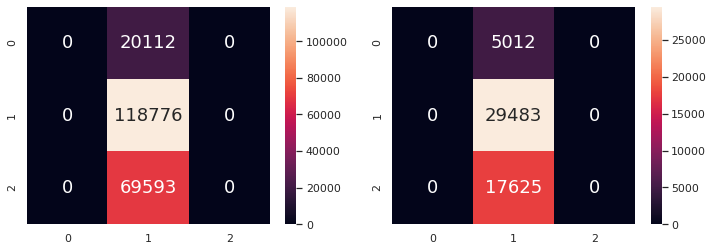

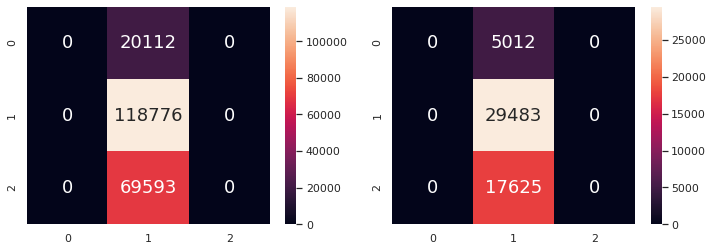

In [0]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Extract Response and Predictors
# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
y93sd = pd.DataFrame(df3['damage_grade'])
X93sd = pd.DataFrame(df3['has_superstructure_cement_mortar_brick'])
X_train, X_test, y_train, y_test = train_test_split(X93sd, y93sd, test_size = no)

#importing library and building model

catclf=CatBoostClassifier(iterations=5000,depth=None,verbose=1)#iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')

catclf.fit(X_train, y_train,cat_features=None)

# Train the new classifier on the new dataset containing the most important features


# Apply The Full Featured Classifier To The Test Data
y_train_pred= catclf.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = catclf.predict(X_test)



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
#has_superstructure_mud_mortar_stone vs damage_grade

Streaming output truncated to the last 5000 lines.
7:	learn: 1.0304071	total: 661ms	remaining: 6m 52s
8:	learn: 1.0235446	total: 748ms	remaining: 6m 54s
9:	learn: 1.0169856	total: 831ms	remaining: 6m 54s
10:	learn: 1.0107138	total: 907ms	remaining: 6m 51s
11:	learn: 1.0047146	total: 983ms	remaining: 6m 48s
12:	learn: 0.9989739	total: 1.06s	remaining: 6m 48s
13:	learn: 0.9934788	total: 1.15s	remaining: 6m 49s
14:	learn: 0.9882171	total: 1.23s	remaining: 6m 49s
15:	learn: 0.9831774	total: 1.32s	remaining: 6m 50s
16:	learn: 0.9783492	total: 1.4s	remaining: 6m 51s
17:	learn: 0.9737223	total: 1.49s	remaining: 6m 52s
18:	learn: 0.9692873	total: 1.57s	remaining: 6m 52s
19:	learn: 0.9650354	total: 1.67s	remaining: 6m 56s
20:	learn: 0.9609581	total: 1.77s	remaining: 6m 58s
21:	learn: 0.9570476	total: 1.85s	remaining: 6m 59s
22:	learn: 0.9532964	total: 1.94s	remaining: 6m 59s
23:	learn: 0.9496974	total: 2.02s	remaining: 6m 59s
24:	learn: 0.9462440	total: 2.11s	remaining: 6m 59s
25:	learn: 0.9429

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.00      0.00      0.00     20165
           2       0.57      1.00      0.73    118576
           3       0.00      0.00      0.00     69740

    accuracy                           0.57    208481
   macro avg       0.19      0.33      0.24    208481
weighted avg       0.32      0.57      0.41    208481


Classsification Metrics for Test Data:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4959
           2       0.57      1.00      0.73     29683
           3       0.00      0.00      0.00     17478

    accuracy                           0.57     52120
   macro avg       0.19      0.33      0.24     52120
weighted avg       0.32      0.57      0.41     52120



Accuracy score for the new selected train data 0.5687616617341629
Accuracy score for the new selected test data: 0.569512663085188

Classsification Metrics for Train Data:

              precisio

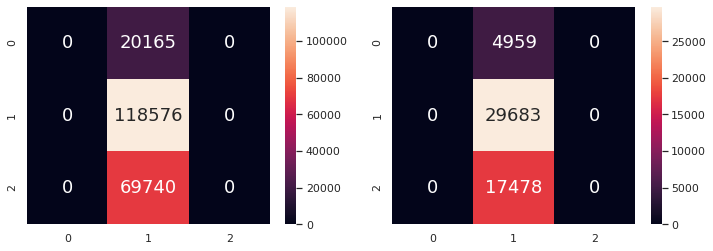

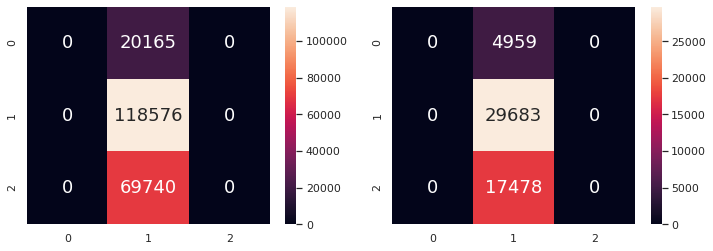

In [0]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Extract Response and Predictors
# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
y93sd = pd.DataFrame(df3['damage_grade'])
X93sd = pd.DataFrame(df3['has_superstructure_mud_mortar_stone'])
X_train, X_test, y_train, y_test = train_test_split(X93sd, y93sd, test_size = no)

#importing library and building model

catclf=CatBoostClassifier(iterations=5000,depth=None,verbose=1)#iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')

catclf.fit(X_train, y_train,cat_features=None)

# Train the new classifier on the new dataset containing the most important features


# Apply The Full Featured Classifier To The Test Data
y_train_pred= catclf.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = catclf.predict(X_test)



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# LightGBM

In [0]:
# Lightgbm LGBMClassifier not good but fast

[155 194 138  50 112 119 141  44  44  48  51  66  29   9  17   0   0   0
   0   0   0  25 447 154 206 238 768  98 103  17 126 125 211 176 178 111
  22 159  17 287 133 105 184  93  71  55 293  17  34  85  83 124  71  94
  78  67  71 171  56  89  82  85  79  78  83 109  79 115  99  80  36 123
  79 142  57  41  45  72  16  29  38  46  41  48   8  78  81   9  21 110
  37  50  26  16  50   8   1   0  14   0   0   0   0  35   0  31  13  10
  35   6]

Accuracy score for the new selected train data 0.696864462469002
Accuracy score for the new selected test data: 0.6936492709132771

Classsification Metrics for Train Data:

              precision    recall  f1-score   support

           1       0.67      0.41      0.51     20165
           2       0.69      0.84      0.76    118565
           3       0.71      0.53      0.61     69751

    accuracy                           0.70    208481
   macro avg       0.69      0.59      0.63    208481
weighted avg       0.70      0.70      0.69    20848

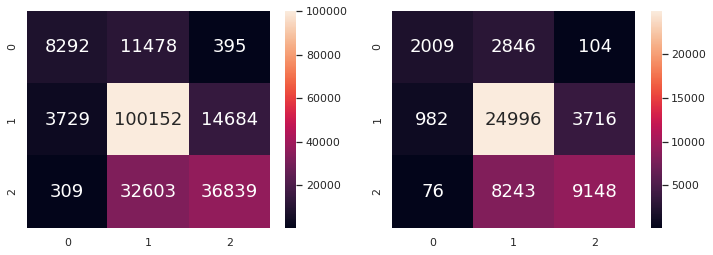

In [0]:
# Light LGBMClassifier
# Features are in train and labels are in train_labels

X = pd.DataFrame(df3)
y = pd.DataFrame(df3[['damage_grade']])

# One Hot vs LabelEncoding https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b
# Manual Standard Scaling for "Age" and "count floors pre eq" 
# Possible to use Sklearn library
# One Hot Encoding requires a 2D matrix but however if rows in a dataset are proved to be odd then it is impossible for the dataset to be exactly divisible by two 
# Therefore pandas actually may prove to be a better option instead of using sklearn OHC
age = X['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X['age'] = age.T


floors = X['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X['count_floors_pre_eq'] = floors.T


# Min-Max Scaling of Dataset
# Refer to this http://benalexkeen.com/feature-scaling-with-scikit-learn/ and https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

ap = X['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X.drop(['area_percentage'], axis = 1, inplace = True)
X['area_percentage'] = ap.T



hp = X['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X.drop(['height_percentage'], axis = 1, inplace = True)
X['height_percentage'] = hp.T


cuts = pd.cut(X['geo_level_1_id'], 21)
X.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_1_id'] = cuts.T



cuts = pd.cut(X['geo_level_2_id'], 23)
X.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_2_id'] = cuts.T

temp = X['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X.drop(['geo_level_3_id'], axis = 1, inplace = True)
X['geo_level_3_id'] = temp.T


cf = X['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X.drop(['count_families'], axis = 1, inplace = True)
X['count_families'] = np.array(cf_new).T


category_cols = ['geo_level_1_id', 'geo_level_2_id', 'roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
X = pd.get_dummies(X, columns = category_cols)
X.drop(['damage_grade'], axis=1 ,inplace=True)
X.drop(['building_id'], axis=1 ,inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = no)

from lightgbm import LGBMClassifier 
l = LGBMClassifier(n_estimators=10000,boosting_type='dart')

lgb.fit(X_train,y_train.values.ravel())
print(lgb.feature_importances_)




# Apply The Full Featured Classifier To The Test Data
y_train_pred= lgb.predict(X_train)


# Apply The Full Featured Classifier To The Test Data
y_test_pred = lgb.predict(X_test)



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



print()
# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",accuracy_score(y_train, y_train_pred))

print()

from sklearn.metrics import classification_report


print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()




# XGBoost

In [0]:
#XGBoost Classifier

In [0]:
#XGBoost
from numpy import loadtxt
from xgboost import DMatrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract Response and Predictors
ylasty = pd.DataFrame(df3['damage_grade'])
Xlasty = pd.DataFrame(numtrain)

data_dmatrix = DMatrix(data=Xlasty,label=ylasty)

# Split the Dataset into Train and Test
print("Train Size:", num)
print("Testing Size:", no)
print("Total Size:", num+no)
X_train, X_test, y_train, y_test = train_test_split(Xlasty, ylasty, test_size = no)

xgb = XGBClassifier()
xgb.fit(X_train, y_train.values.ravel())

from sklearn.model_selection import GridSearchCV
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05,0.15,0.3], #so called `eta` value
              'sampling_method': ['uniform','gradient_based'],
              'max_depth': [5,6,7],
              'min_child_weight': [1,5,10,11],
              'subsample': [0.5,0.8,1],
              'colsample_bytree': [0.7,1],
              'n_estimators': [10,15], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}
xgbcv = GridSearchCV(xgb,parameters,n_jobs=-1,verbose=1,cv=3)

xgbcv_results = xgbcv.fit(X_train, y_train.values.ravel())
y1_train_pred= xgbcv.predict(X_train)
print(metrics.accuracy_score(y_train, y1_train_pred)))
print("Best params:", xgbcv_results.best_params_)

#Predicting the Model 

y_train_pred = xgb.predict(X_train)

y_test_pred = xgb.predict(X_test)



# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy score for the new selected train data",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy score for the new selected test data:",metrics.accuracy_score(y_test, y_test_pred))
print()

from sklearn.metrics import classification_report

print("Classsification Metrics for Train Data:")
print()
print(classification_report(y_train, y_train_pred))
print()
print("Classsification Metrics for Test Data:")
print()
print(classification_report(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Train Size: 208481
Testing Size: 52120
Total Size: 260601
Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 31.7min
